In [1]:
import pandas as pd
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [2]:
df.shape

(5000, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df['Personal Loan'].value_counts().head()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [7]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

ValueError: num must be 1 <= num <= 12, not 13

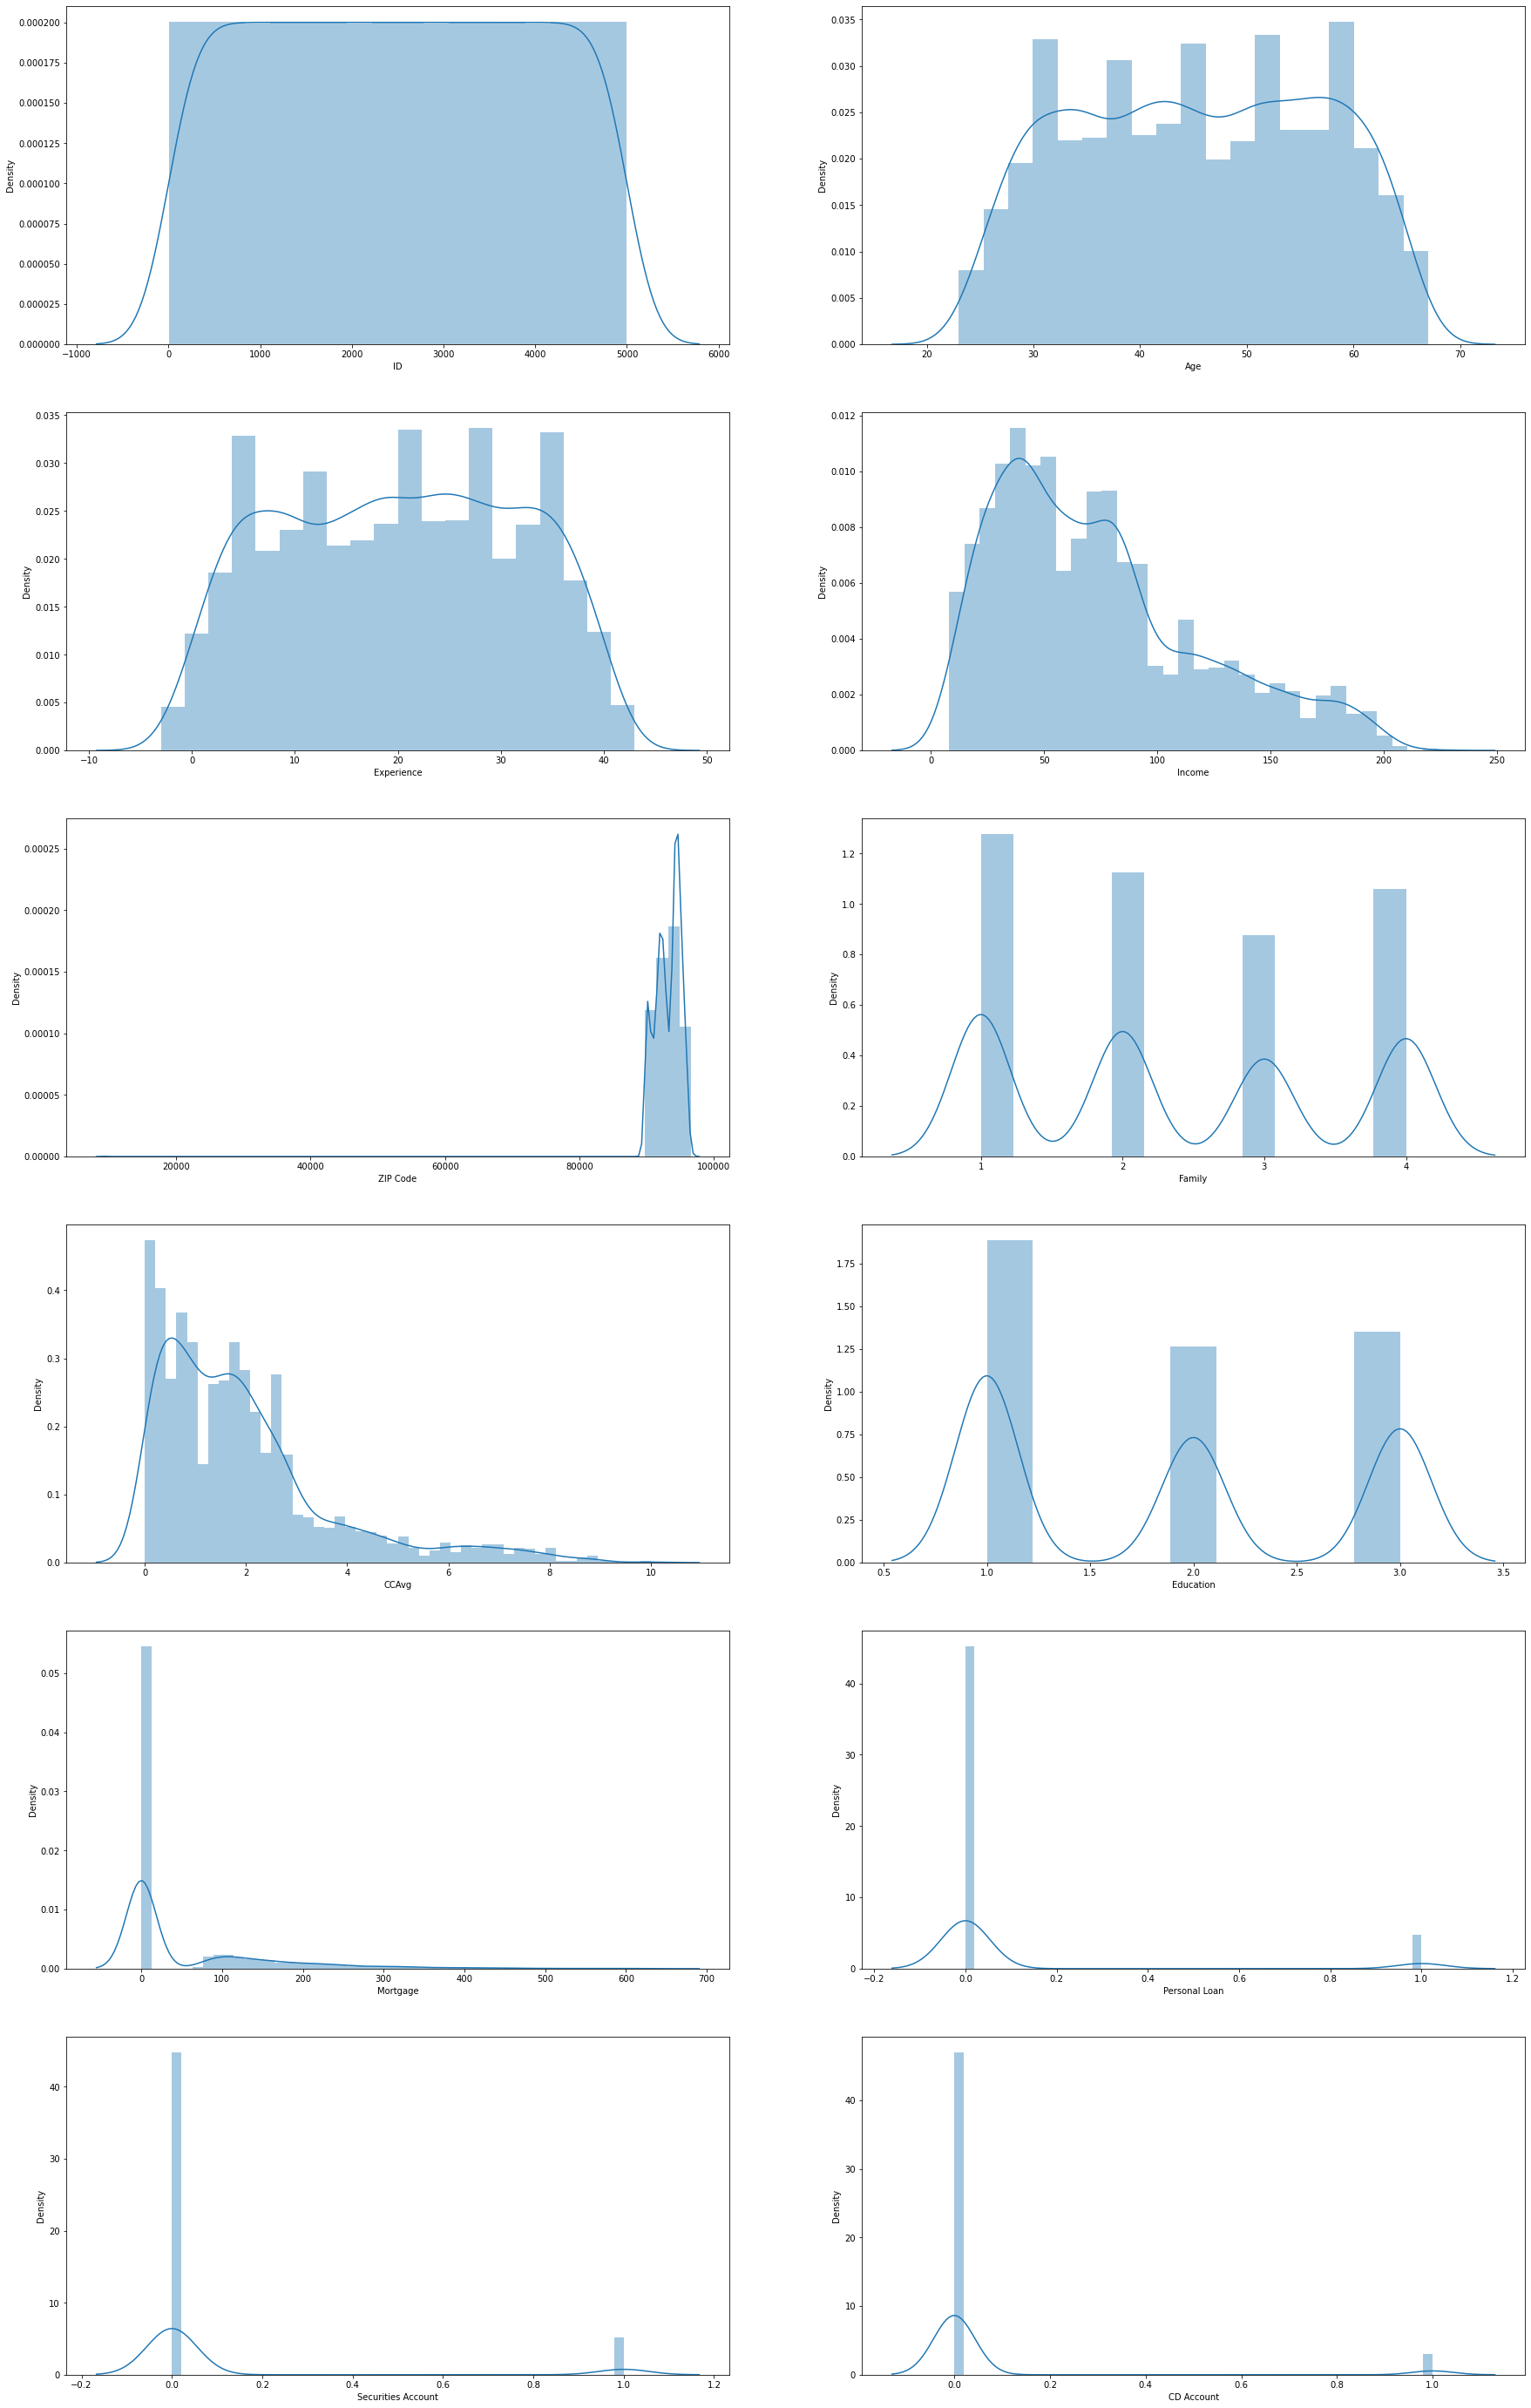

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (30,50))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(6, 2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show

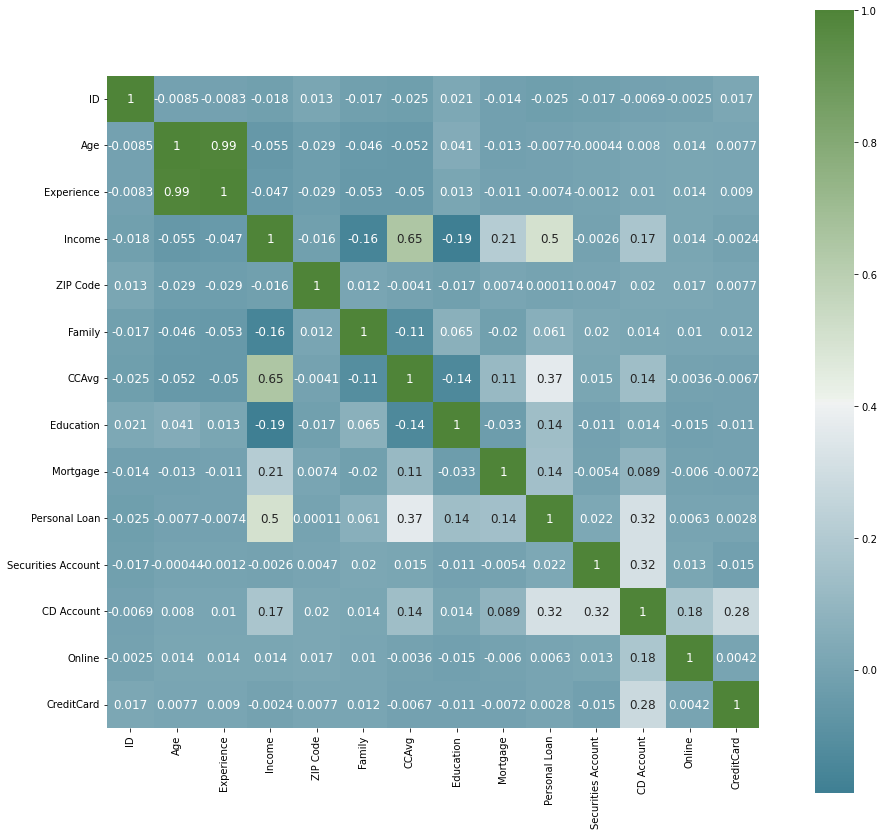

In [10]:
def plot_correlation_map(df):
    corr = df.corr()
    s, ax = plt.subplots(figsize = (20,12))
    cmap = sns.diverging_palette(220,120,as_cmap = True)
    s = sns.heatmap(
        corr,
        cmap = cmap,
        square = True,
        cbar_kws = {'shrink' : 1.2},
        ax = ax,
        annot = True,
        annot_kws = {'fontsize' : 12},    
    )
plot_correlation_map(df)

personal loan increase when income, CCAvg, education, mortgage and CD acc increase
income increase when family and education decrease
                when CCAverage, mortgage and CD acc

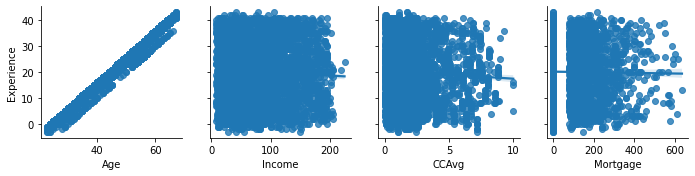

In [11]:
q_Var = ['Age', 'Income', 'CCAvg', 'Mortgage']
expGrid = sns.PairGrid(df, y_vars = 'Experience', x_vars = q_Var)
expGrid.map(sns.regplot)

In [12]:
df_sum = df.describe()

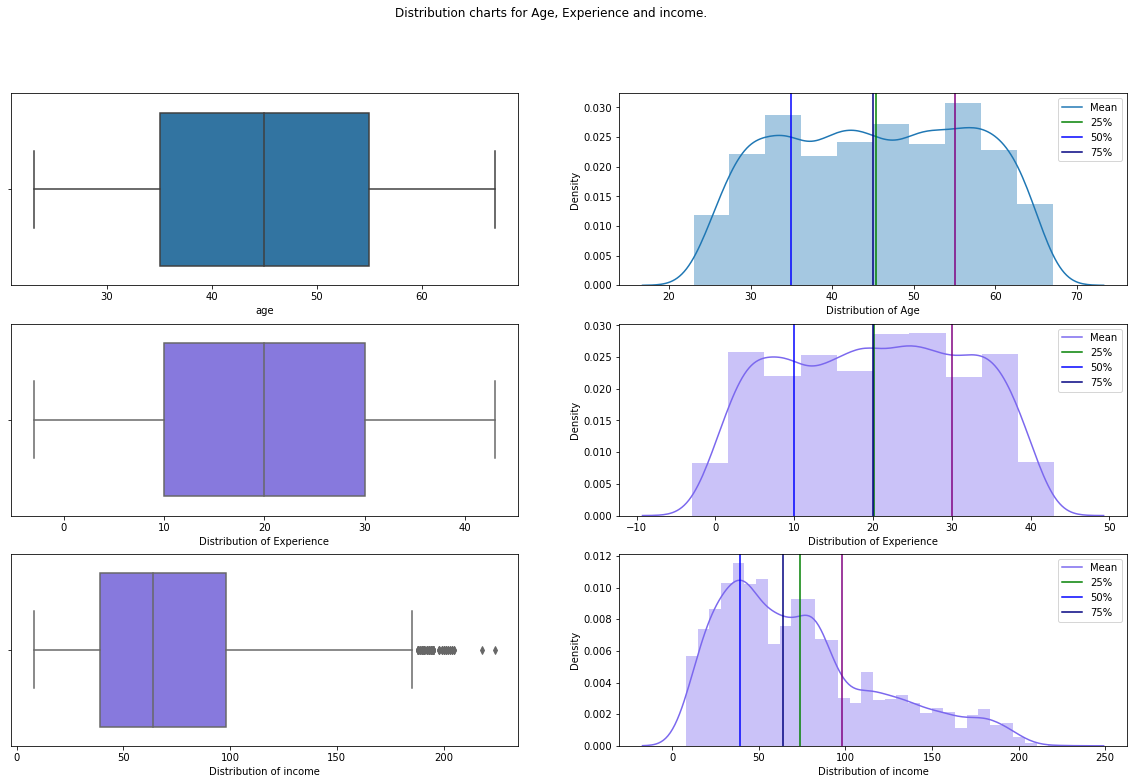

In [13]:
def draw_axvlines(plt, col):
    mean = df_sum.loc["mean", col]
    q1 = df_sum.loc["25%", col]
    q2 = df_sum.loc["50%", col]
    q3 = df_sum.loc["75%", col]
    plt.axvline(mean, color = 'g')
    plt.axvline(q1, color = "b");               
    plt.axvline(q2, color = "navy");            
    plt.axvline(q3, color = "purple");           
    plt.legend({"Mean": mean, "25%" : q1, "50%" : q2, "75%" : q3});

fig, axes = plt.subplots(3, 2, figsize = (20, 12));
fig.suptitle('Distribution charts for Age, Experience and income.'); 

sns.boxplot(df["Age"], ax = axes[0][0]);
axes[0][0].set(xlabel = 'age');

pp = sns.distplot(df["Age"], ax = axes[0][1], bins = 10);
axes[0][1].set(xlabel = 'Distribution of Age');
draw_axvlines(pp, "Age");

sns.boxplot(df["Experience"], ax = axes[1][0], 
            color = "mediumslateblue");
axes[1][0].set(xlabel = 'Distribution of Experience');

pp = sns.distplot(df["Experience"], ax = axes[1][1], bins = 10, 
                  color = "mediumslateblue");
axes[1][1].set(xlabel = 'Distribution of Experience');
draw_axvlines(pp, "Experience")

sns.boxplot(df["Income"], ax = axes[2][0], color = "mediumslateblue");
axes[2][0].set(xlabel = 'Distribution of income');

pp = sns.distplot(df["Income"], ax = axes[2][1], 
                  color = "mediumslateblue");
axes[2][1].set(xlabel = 'Distribution of income');
draw_axvlines(pp, "Income")

In [14]:
df["Experience"] = df["Experience"].apply(abs)

In [15]:
df["Experience"].value_counts().head()

32    154
20    148
9     147
5     146
23    144
Name: Experience, dtype: int64

In [16]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

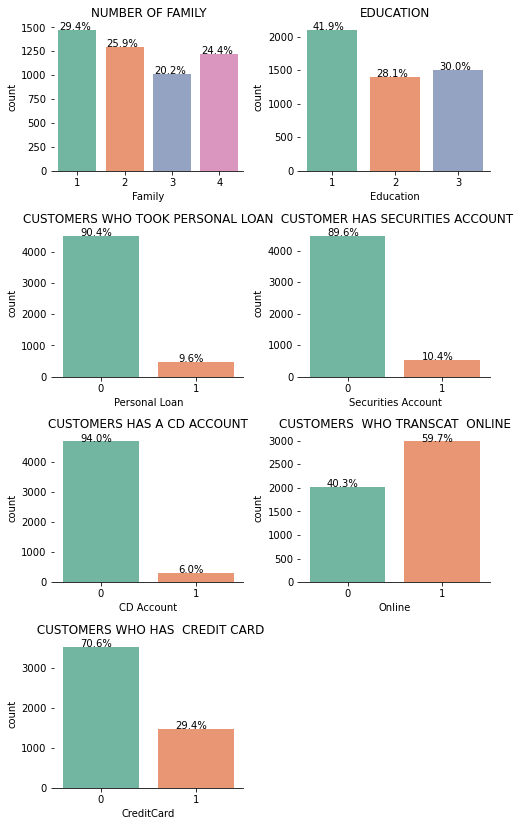

In [17]:


cat_columns = ['Family',   'Education',   'Personal Loan',   
               'Securities Account',
               'CD Account',   'Online',   'CreditCard']
title=['Number of Family', 'Education',
       'Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',
       ' Customers who has  Credit Card']
.

In [18]:
loan_counts = pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
loan_counts.columns = ["Labels", 'Personal Loan']
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


Text(0.5, 1.0, 'Pie chart representation of Dependent variable: Survived')

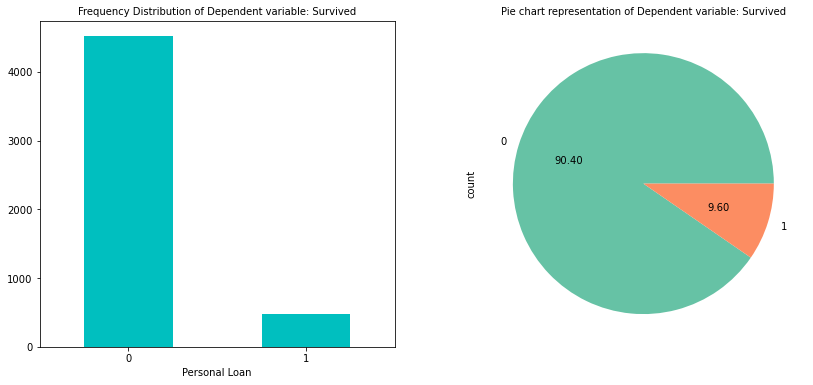

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2,squeeze=True)
fig.set_size_inches(14,6)
frequency_colums= pd.crosstab(index=df["Personal Loan"],columns="count")
frequency_colums.plot(kind='bar',ax=ax[0],color="c",legend=False,rot=True,fontsize=10)
frequency_colums.plot(kind='pie',ax=ax[1],subplots=True,legend=False,fontsize=10,autopct='%.2f')
ax[0].set_title('Frequency Distribution of Dependent variable: Survived',fontsize=10)
ax[1].set_title('Pie chart representation of Dependent variable: Survived',fontsize=10)

In [22]:
import numpy as np
def cat_view(x = 'Education'):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
     
    """
    Draw a Pie Chart on first subplot.
    """    
    s = df.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax[0].set_title(f'{x.capitalize()} Piechart')
    
    
    """
    Draw a Bar Graph on second subplot.
    """
    
    df2 = pd.pivot_table(df, index = [x], columns = ['Personal Loan'], values = ['Income'], aggfunc = len)

    labels = df2.index.tolist()
    loan_no = df2.values[:, 0].tolist()
    loan_yes = df2.values[:, 1].tolist()
    
    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(l - width/2, loan_no, width, label='No Loan', color = 'tan')
    rects2 = ax[1].bar(l + width/2, loan_yes, width, label='Loan', color = 'pink')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    
    ax[1].set_ylabel('Scores')
    ax[1].set_title(f'{x.capitalize()} Bar Graph')
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()
    
    def autolabel(rects):
        
        """Attach a text label above each bar in *rects*, displaying its height."""
        
        for rect in rects:
            height = rect.get_height()
            ax[1].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'large',   
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

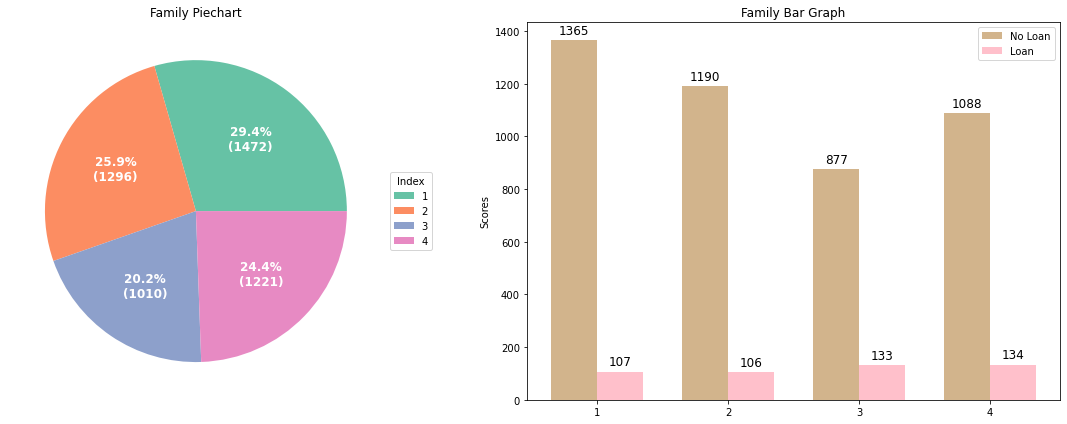

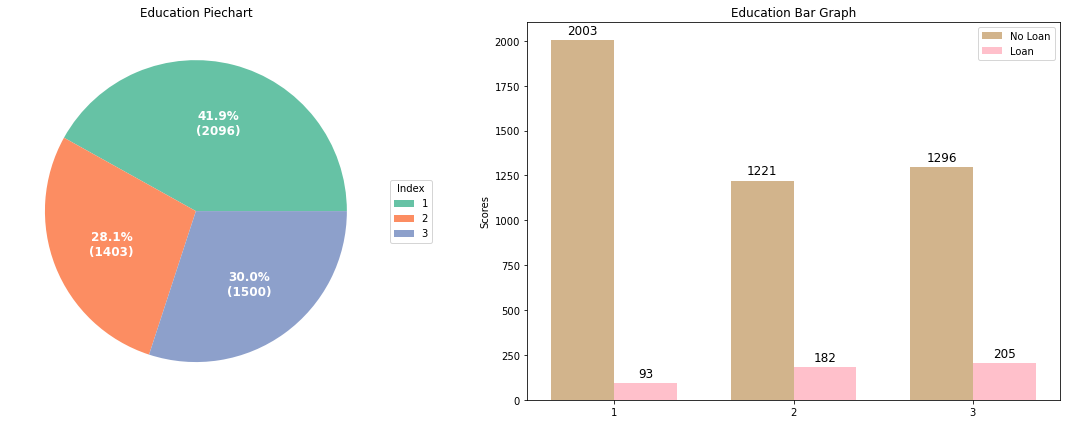

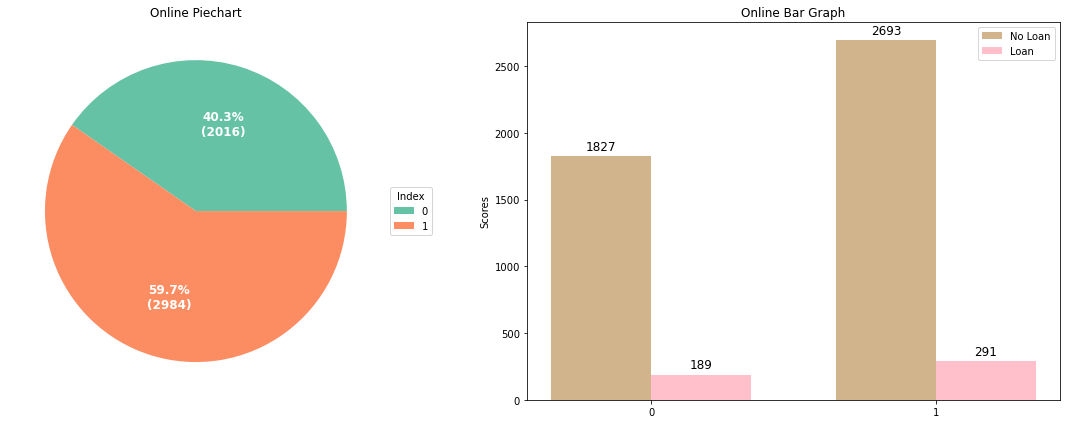

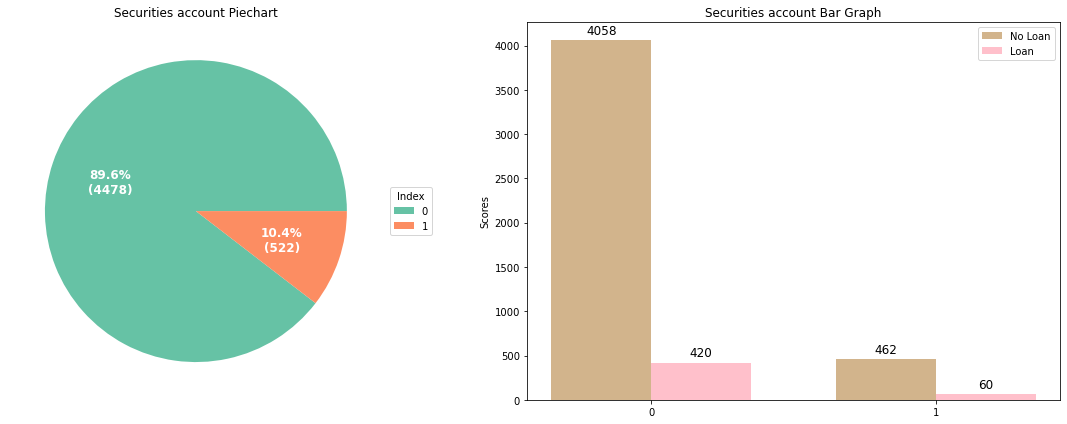

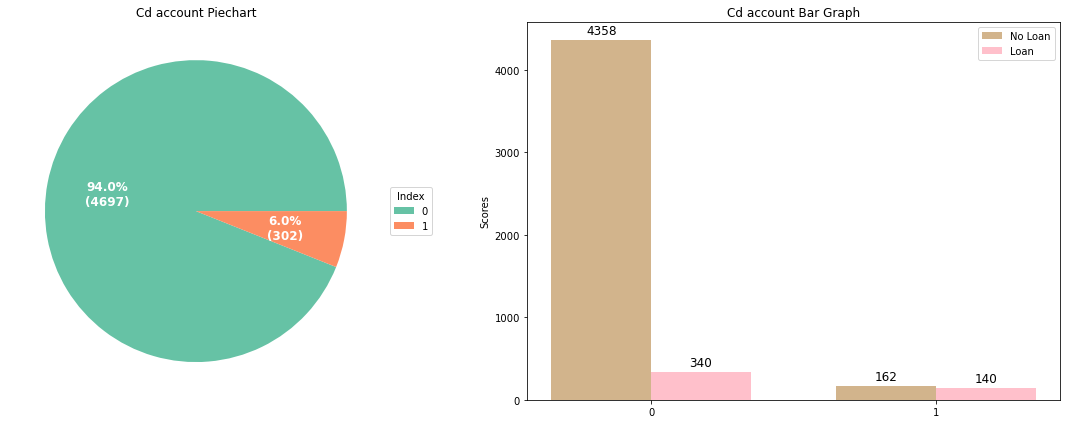

In [23]:
cat_view('Family')
cat_view('Education')
cat_view('Online')
cat_view('Securities Account')
cat_view('CD Account')

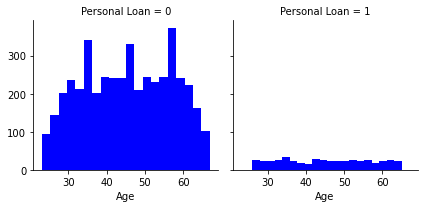

In [24]:
A = sns.FacetGrid(df, col = 'Personal Loan')
A.map(plt.hist,'Age', bins=20,color='b')

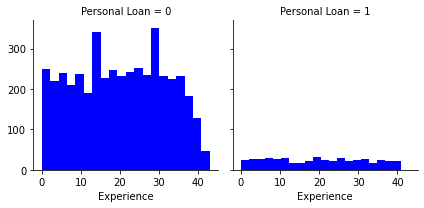

In [25]:
E= sns.FacetGrid(df, col='Personal Loan')
E.map(plt.hist,'Experience', bins=20,color='b')

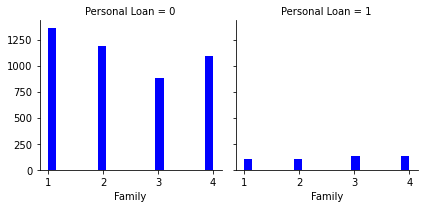

In [26]:
F= sns.FacetGrid(df, col='Personal Loan')
F.map(plt.hist,'Family', bins=20,color='b')

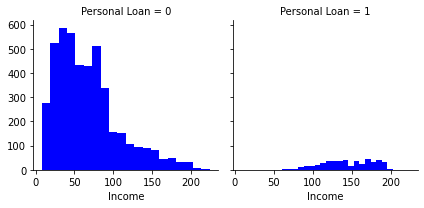

In [27]:
I = sns.FacetGrid(df, col='Personal Loan')
I.map(plt.hist,'Income', bins=20,color='b')

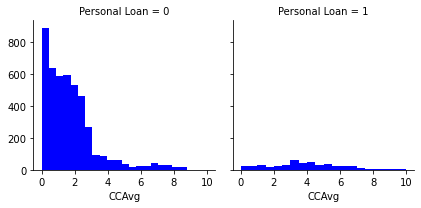

In [28]:
C= sns.FacetGrid(df, col='Personal Loan')
C.map(plt.hist,'CCAvg', bins=20,color='b')

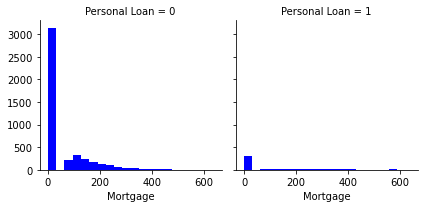

In [29]:
M= sns.FacetGrid(df, col='Personal Loan')
M.map(plt.hist,'Mortgage', bins=20,color='b')

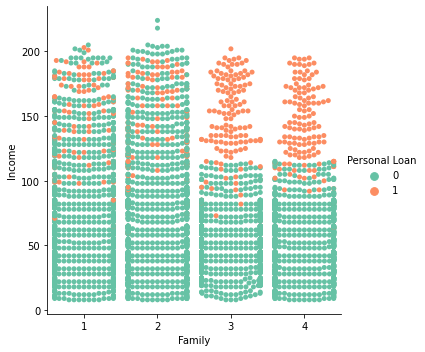

In [30]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df, 
            kind='swarm')

<AxesSubplot:xlabel='Education', ylabel='Income'>

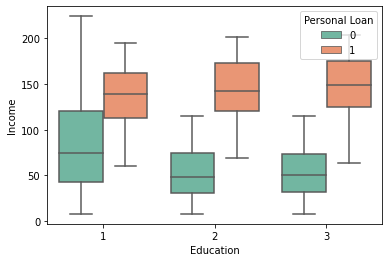

In [31]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = df)

<AxesSubplot:xlabel='Family', ylabel='CCAvg'>

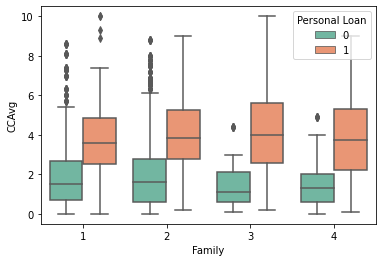

In [32]:
sns.boxplot(x='Family',y='CCAvg',hue='Personal Loan',data=df)

<AxesSubplot:xlabel='CreditCard', ylabel='CCAvg'>

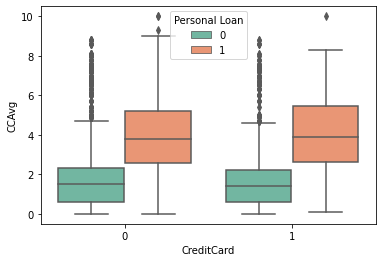

In [33]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=df)

Text(0.5, 1.0, 'Income and CCAvg Scatter Distribution')

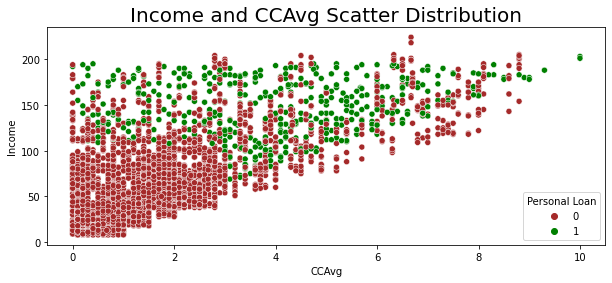

In [34]:
plt.figure(figsize=(10,4))
sns.scatterplot(df.CCAvg, df.Income, hue = df['Personal Loan'],
                palette= ['Brown','g'])

plt.title('Income and CCAvg Scatter Distribution',fontsize=20)

Text(0.5, 1.0, 'Income and  Mortgage Distribution')

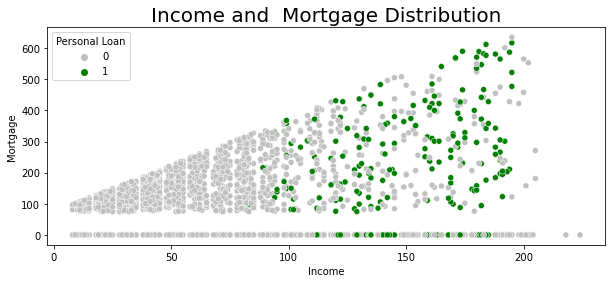

In [35]:
plt.figure(figsize=(10,4))
sns.scatterplot(df.Income, df.Mortgage,hue = df['Personal Loan'], 
                palette= ['Silver','g'])

plt.title('Income and  Mortgage Distribution',fontsize=20)

<AxesSubplot:xlabel='Income', ylabel='CCAvg'>

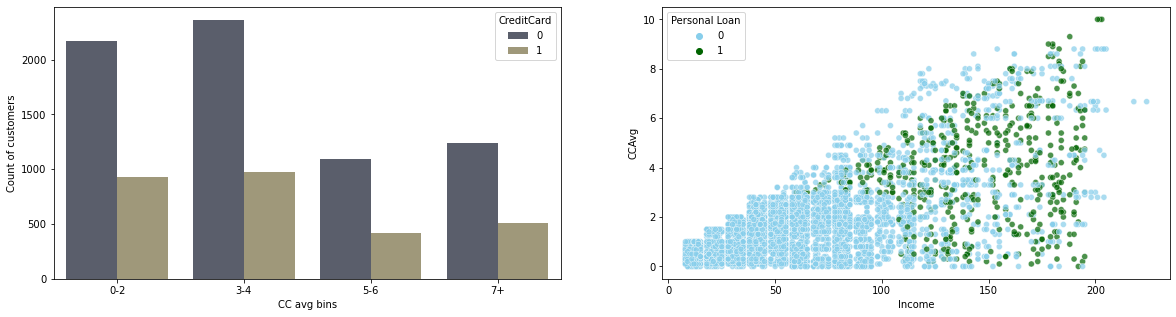

In [36]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

xx = df[["CCAvg", "CreditCard", "Personal Loan"]]
xx['ccavg_bin'] = pd.cut(xx['CCAvg'], bins = [0, 2, 4, 6, 100], 
                         labels = ['0-2', '3-4', '5-6', '7+'])
xx = xx.groupby(["ccavg_bin", 
                 "CreditCard"])["CCAvg"].sum().reset_index()
sns.barplot(xx["ccavg_bin"], xx["CCAvg"], hue = xx["CreditCard"], 
            palette= "cividis", ax=axes[0]);
axes[0].set(xlabel = 'CC avg bins', ylabel = 'Count of customers');

sns.scatterplot(x = "Income", y = "CCAvg", data = df, 
                hue = "Personal Loan", ax = axes[1], 
                palette=["skyblue", "darkgreen"], alpha = 0.7)

In [37]:
def plot_confusion_matrix(cm, classes, normalize = False, title = "cm",
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpretation = "nearest", cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_markes, classes, rotation = 90)
    plt.yticks(tick_markes, classes)
    ax = plt.gca()
    ax.set_ylim(-.5, 5.5)
    
    fmt = '.2f' if normalized else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), 
                                  range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment = 'center', 
                 color = "white" if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
def perform_model(model, X_train, y_train, X_test, y_test,class_labels, cm_normalize=True,print_cm=True, cm_cmap=plt.cm.Reds):
    results = dict()
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred

In [39]:
X = df[['Income', 'Experience', 'CCAvg', 'Education', 'Mortgage', 'CD Account']]
y = df["Personal Loan"]

In [40]:
from imblearn.over_sampling import SMOTE
ms = SMOTE(random_state = 1)
x_ms, y_ms = ms.fit_resample(X, y)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
     test_size = .3, random_state = 0)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

In [ ]:
print(accuracy_score(y_train, gnb.predict(X_train)))

gnb_acc = accuracy_score(y_test, gnb.predict(X_test))
print(gnb_acc)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
models = pd.DataFrame({
    'model' : ['log reg', 'knn', 'naive'],
    'score' : [log_reg_acc, knn_acc, gnb_acc]
})

models.sort_values(by = 'score', ascending = False)

use KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
parameters = {"C": [0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol = .0005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid = parameters, n_jobs = -1,
                          verbose = 1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train,
                                    X_test, y_test, 
                                    class_labels = labels)